In [25]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data_path_mask = r'nnU-net/secret_test_predictions/'
data_path_img=r'../dataset/secret_test_set'


In [32]:
mask_file = os.path.join(data_path_mask, 'patient151_frame01.nii.gz')
image_file=os.path.join(data_path_img, 'patient151/patient151_frame01.nii.gz')


mask=sitk.ReadImage(mask_file)
image = sitk.ReadImage(image_file)

mask_array=sitk.GetArrayFromImage(mask)
image_array = sitk.GetArrayFromImage(image)

In [41]:
import scipy.ndimage as scnd
from IPython.display import display, clear_output

# Only consider one image slice
image_slice = image_array[9, :, :].squeeze().transpose()

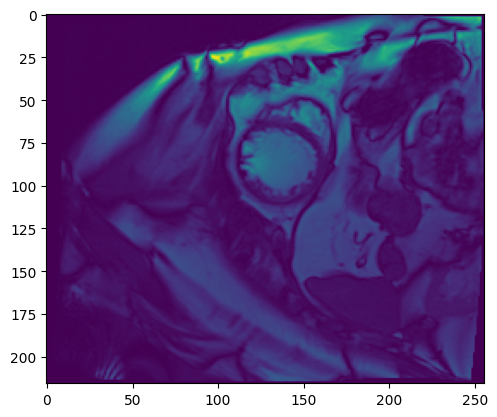

In [42]:
plt.imshow(image_slice)
plt.show()

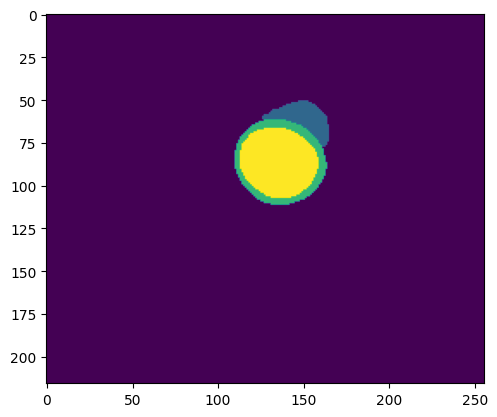

In [43]:
mask_slice = mask_array[9, :, :].squeeze().transpose()

plt.imshow(mask_slice)
plt.show()

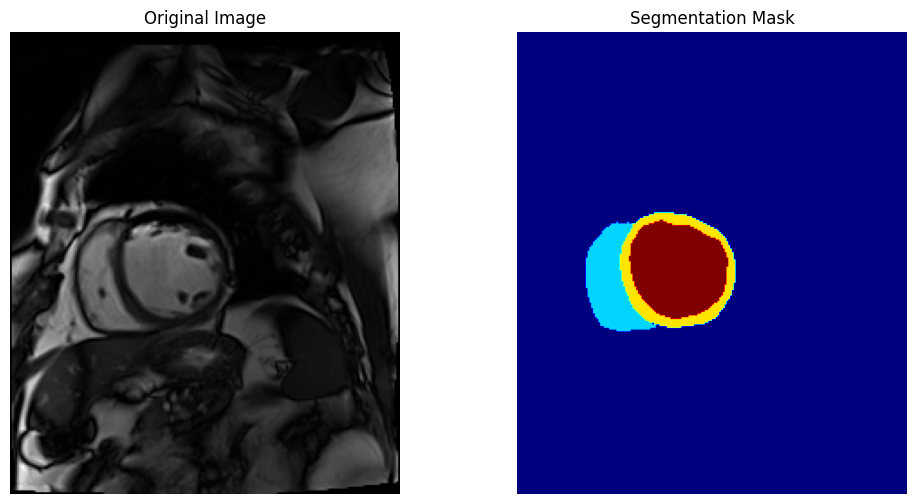

In [45]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
data_path_mask = r'nnU-net/secret_test_predictions/'
data_path_img=r'../dataset/secret_test_set'

mask_file = os.path.join(data_path_mask, "patient151_frame01.nii.gz")
image_file = os.path.join(data_path_img, "patient151/patient151_frame01.nii.gz")

# Load NIfTI files
mask = sitk.ReadImage(mask_file)
image = sitk.ReadImage(image_file)

# Convert to NumPy arrays
mask_array = sitk.GetArrayFromImage(mask)
image_array = sitk.GetArrayFromImage(image)

# Select the middle slice for visualization
slice_idx = image_array.shape[0] // 2  # Choose the middle slice

# Normalize image for visualization
def normalize_image(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img)) if np.max(img) > np.min(img) else img

# Plot image and mask
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
axarr[0].imshow(normalize_image(image_array[slice_idx]), cmap="gray")
axarr[0].set_title("Original Image")
axarr[0].axis("off")

# Segmentation Mask
axarr[1].imshow(mask_array[slice_idx], cmap="jet", vmin=0, vmax=np.max(mask_array))
axarr[1].set_title("Segmentation Mask")
axarr[1].axis("off")

plt.show()


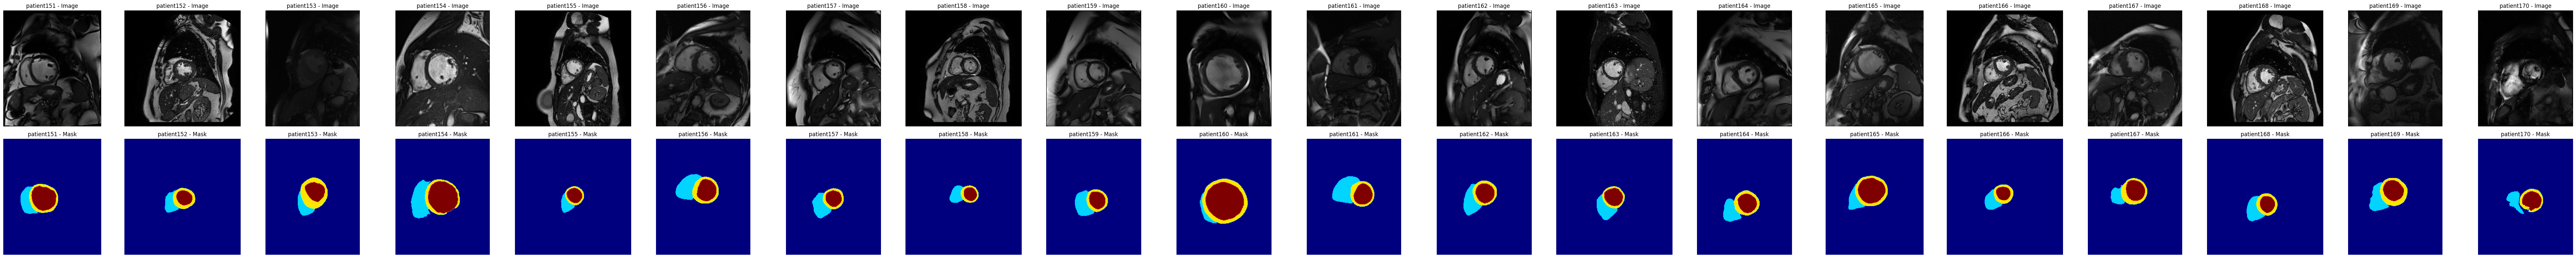

In [5]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
data_path_mask = 'nnU-net/secret_test_predictions/'
data_path_img = '../dataset/secret_test_set/'

# Get a list of patient IDs
patient_ids = sorted([f for f in os.listdir(data_path_img) if f.startswith("patient")])
num_patients = min(len(patient_ids), 20)  # Adjust the number of patients to visualize

# Normalize image for visualization
def normalize_image(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img)) if np.max(img) > np.min(img) else img

fig, axarr = plt.subplots(2, num_patients, figsize=(num_patients * 4, 8))

for i, patient_id in enumerate(patient_ids[:num_patients]):
    image_file = os.path.join(data_path_img, patient_id, f"{patient_id}_frame01.nii.gz")
    mask_file = os.path.join(data_path_mask, f"{patient_id}_frame01.nii.gz")
    
    if os.path.exists(image_file) and os.path.exists(mask_file):
        image = sitk.ReadImage(image_file)
        mask = sitk.ReadImage(mask_file)
        
        image_array = sitk.GetArrayFromImage(image)
        mask_array = sitk.GetArrayFromImage(mask)
        
        slice_idx = image_array.shape[0] // 2  # Choose the middle slice
        
        # Plot image
        axarr[0, i].imshow(normalize_image(image_array[slice_idx]), cmap="gray")
        axarr[0, i].set_title(f"{patient_id} - Image")
        axarr[0, i].axis("off")
        
        # Plot mask
        axarr[1, i].imshow(mask_array[slice_idx], cmap="jet", vmin=0, vmax=np.max(mask_array))
        axarr[1, i].set_title(f"{patient_id} - Mask")
        axarr[1, i].axis("off")
    
plt.tight_layout()
plt.show()